# <center>Smart Lead Scoring Engine

## <font color=blue>Problem Statement</font>

A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers). 


Leads are captured in 2 ways - Directly and Indirectly. 


Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.


Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.


Now, as a data scientist, your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.

## <font color=blue>Loading and understanding the data</font>

In [1]:
# Importing the pandas and numpy for data frame operations
import numpy as np, pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Looking the files in the directory
%ls

 Volume in drive C is Acer
 Volume Serial Number is 00FE-309B

 Directory of C:\My files\Upgrad Data science\Projects\Competition\Analytics Vidhya\Job-a-thon_June 2022\Analysis

05-06-2022  21:34    <DIR>          .
05-06-2022  21:34    <DIR>          ..
05-06-2022  21:26    <DIR>          .ipynb_checkpoints
05-06-2022  20:17                23 .jovianrc
04-06-2022  19:07           506,126 1. Smart Lead Scoring Engine_logistic Regression.ipynb
05-06-2022  03:57         1,048,074 10. Smart Lead Scoring Engine_ADABoost_with tuning_without date column_entire data trained.ipynb
05-06-2022  21:34         1,050,155 10. Smart Lead Scoring Engine_ADABoost_with tuning_without date column_entire data trained_final Copy.ipynb
05-06-2022  21:20         1,097,057 11. Smart Lead Scoring Engine_Random Forest_with tuning_without date column_entire data trained.ipynb
04-06-2022  16:07           881,825 2. Smart Lead Scoring Engine_XGBoost_without_tuning.ipynb
04-06-2022  17:21         1,249,913 3. Smart

In [3]:
# Loading the train data
lead_train = pd.read_csv("train_wn75k28.csv")
lead_train.set_index("id",inplace=True)

# Loading the test Data
lead_test = pd.read_csv("test_Wf7sxXF.csv")
lead_test.set_index("id",inplace=True)


# Loading the sample submission data
lead_sample = pd.read_csv("sample_submission_2zvVjBu.csv")
lead_sample.set_index('id',inplace=True)

In [4]:
# Checking the shape of all the data frames

print("Train data shape:",lead_train.shape)
print("Test Data shape:",lead_test.shape)
print("submission Data shape:",lead_sample.shape)

Train data shape: (39161, 18)
Test Data shape: (13184, 17)
submission Data shape: (13184, 1)


### <font color=blue>Checking the Train data set</font>

In [5]:
# Checking the info() of train data set

lead_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39161 entries, 1 to 39161
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            39161 non-null  object 
 1   campaign_var_1        39161 non-null  int64  
 2   campaign_var_2        39161 non-null  int64  
 3   products_purchased    18250 non-null  float64
 4   signup_date           24048 non-null  object 
 5   user_activity_var_1   39161 non-null  int64  
 6   user_activity_var_2   39161 non-null  int64  
 7   user_activity_var_3   39161 non-null  int64  
 8   user_activity_var_4   39161 non-null  int64  
 9   user_activity_var_5   39161 non-null  int64  
 10  user_activity_var_6   39161 non-null  int64  
 11  user_activity_var_7   39161 non-null  int64  
 12  user_activity_var_8   39161 non-null  int64  
 13  user_activity_var_9   39161 non-null  int64  
 14  user_activity_var_10  39161 non-null  int64  
 15  user_activity_var_1

In [6]:
# Checking the null values

lead_train.isnull().sum().sort_values(ascending=False)

products_purchased      20911
signup_date             15113
buy                         0
user_activity_var_12        0
campaign_var_1              0
campaign_var_2              0
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
created_at                  0
dtype: int64

In [7]:
# Checking the null value percentage

round((lead_train.isnull().sum()/len(lead_train))*100,2).sort_values(ascending=False)

products_purchased      53.40
signup_date             38.59
buy                      0.00
user_activity_var_12     0.00
campaign_var_1           0.00
campaign_var_2           0.00
user_activity_var_1      0.00
user_activity_var_2      0.00
user_activity_var_3      0.00
user_activity_var_4      0.00
user_activity_var_5      0.00
user_activity_var_6      0.00
user_activity_var_7      0.00
user_activity_var_8      0.00
user_activity_var_9      0.00
user_activity_var_10     0.00
user_activity_var_11     0.00
created_at               0.00
dtype: float64

### <font color=blue>Checking the test dataset</font>

In [8]:
# Checking the info

lead_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13184 entries, 39162 to 52345
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            13184 non-null  object 
 1   campaign_var_1        13184 non-null  int64  
 2   campaign_var_2        13184 non-null  int64  
 3   products_purchased    5048 non-null   float64
 4   signup_date           6535 non-null   object 
 5   user_activity_var_1   13184 non-null  int64  
 6   user_activity_var_2   13184 non-null  int64  
 7   user_activity_var_3   13184 non-null  int64  
 8   user_activity_var_4   13184 non-null  int64  
 9   user_activity_var_5   13184 non-null  int64  
 10  user_activity_var_6   13184 non-null  int64  
 11  user_activity_var_7   13184 non-null  int64  
 12  user_activity_var_8   13184 non-null  int64  
 13  user_activity_var_9   13184 non-null  int64  
 14  user_activity_var_10  13184 non-null  int64  
 15  user_activity_v

In [9]:
# Checking the null values

lead_test.isnull().sum().sort_values(ascending=False)

products_purchased      8136
signup_date             6649
user_activity_var_12       0
user_activity_var_3        0
campaign_var_1             0
campaign_var_2             0
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_4        0
user_activity_var_11       0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
created_at                 0
dtype: int64

In [10]:
# Checking the null value percentage

round((lead_test.isnull().sum()/len(lead_test))*100,2).sort_values(ascending=False)

products_purchased      61.71
signup_date             50.43
user_activity_var_12     0.00
user_activity_var_3      0.00
campaign_var_1           0.00
campaign_var_2           0.00
user_activity_var_1      0.00
user_activity_var_2      0.00
user_activity_var_4      0.00
user_activity_var_11     0.00
user_activity_var_5      0.00
user_activity_var_6      0.00
user_activity_var_7      0.00
user_activity_var_8      0.00
user_activity_var_9      0.00
user_activity_var_10     0.00
created_at               0.00
dtype: float64

In [11]:
lead_train.head()

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,,,,,,,,,,,,,,,,,,
1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [12]:
lead_test.head()

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
id,,,,,,,,,,,,,,,,,
39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


## <font color=blue>Missing value analysis</font>

**Both `signup_date` and `products_purchased` having more than 30% of null values we can drop the both the columns**

In [13]:
# Dropping the signup_date and products_purchased columns

lead_train_1 = lead_train.drop(['signup_date', "products_purchased" ],axis=1)

lead_train_1.head()

,created_at,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,,,,,,,,,,,,,,,,
1,2021-01-01,1,2,0,0,0,0,0,0,1,1,0,0,0,0,0
2,2021-01-01,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0
3,2021-01-01,9,3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,6,7,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2021-01-01,4,6,0,0,0,0,0,0,1,0,0,0,1,0,0


In [14]:
# Checking the data frame again

lead_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39161 entries, 1 to 39161
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   created_at            39161 non-null  object
 1   campaign_var_1        39161 non-null  int64 
 2   campaign_var_2        39161 non-null  int64 
 3   user_activity_var_1   39161 non-null  int64 
 4   user_activity_var_2   39161 non-null  int64 
 5   user_activity_var_3   39161 non-null  int64 
 6   user_activity_var_4   39161 non-null  int64 
 7   user_activity_var_5   39161 non-null  int64 
 8   user_activity_var_6   39161 non-null  int64 
 9   user_activity_var_7   39161 non-null  int64 
 10  user_activity_var_8   39161 non-null  int64 
 11  user_activity_var_9   39161 non-null  int64 
 12  user_activity_var_10  39161 non-null  int64 
 13  user_activity_var_11  39161 non-null  int64 
 14  user_activity_var_12  39161 non-null  int64 
 15  buy                   39161 non-null

`created_at` column is in object data type we have to convert to datetime data type

In [15]:
# Converting created_at variable to date time format

lead_train_1.created_at = pd.to_datetime(lead_train_1.created_at)

lead_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39161 entries, 1 to 39161
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   created_at            39161 non-null  datetime64[ns]
 1   campaign_var_1        39161 non-null  int64         
 2   campaign_var_2        39161 non-null  int64         
 3   user_activity_var_1   39161 non-null  int64         
 4   user_activity_var_2   39161 non-null  int64         
 5   user_activity_var_3   39161 non-null  int64         
 6   user_activity_var_4   39161 non-null  int64         
 7   user_activity_var_5   39161 non-null  int64         
 8   user_activity_var_6   39161 non-null  int64         
 9   user_activity_var_7   39161 non-null  int64         
 10  user_activity_var_8   39161 non-null  int64         
 11  user_activity_var_9   39161 non-null  int64         
 12  user_activity_var_10  39161 non-null  int64         
 13  user_activity_va

In [17]:
# checking the descriptive statistics on the data frame

lead_train.describe().T

,count,mean,std,min,25%,50%,75%,max
campaign_var_1,39161.0,6.523812,3.472944,1.0,4.0,6.0,9.0,16.0
campaign_var_2,39161.0,6.452746,2.614296,1.0,5.0,6.0,8.0,15.0
products_purchased,18250.0,2.154137,0.779815,1.0,2.0,2.0,3.0,4.0
user_activity_var_1,39161.0,0.400092,0.509194,0.0,0.0,0.0,1.0,3.0
user_activity_var_2,39161.0,0.006716,0.081676,0.0,0.0,0.0,0.0,1.0
user_activity_var_3,39161.0,0.102832,0.303743,0.0,0.0,0.0,0.0,1.0
user_activity_var_4,39161.0,0.011465,0.106463,0.0,0.0,0.0,0.0,1.0
user_activity_var_5,39161.0,0.151503,0.359681,0.0,0.0,0.0,0.0,2.0
user_activity_var_6,39161.0,0.499834,0.558166,0.0,0.0,0.0,1.0,3.0
user_activity_var_7,39161.0,0.286612,0.455784,0.0,0.0,0.0,1.0,2.0


In [17]:
# Checking the how many years of the data is provided

pd.DatetimeIndex(lead_train_1.created_at).year.unique()

Int64Index([2021], dtype='int64', name='created_at')

The data is pertaining to the year of 2021 since this is single value we no need to consider the features

In [18]:
# Checking the months

pd.DatetimeIndex(lead_train_1.created_at).month.unique()

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='created_at')

### <font color=blue>Creating new features</font>

In [19]:
# Creating the month and day column from created_at date column

lead_train_1.insert(loc=1,column="Month",value=pd.DatetimeIndex(lead_train_1.created_at).month)

lead_train_1.insert(loc=2,column="Day",value=pd.DatetimeIndex(lead_train_1.created_at).day)

lead_train_1.head()

,created_at,Month,Day,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,,,,,,,,,,,,,,,,,,
1,2021-01-01,1,1,1,2,0,0,0,0,0,0,1,1,0,0,0,0,0
2,2021-01-01,1,1,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0
3,2021-01-01,1,1,9,3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,1,1,6,7,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2021-01-01,1,1,4,6,0,0,0,0,0,0,1,0,0,0,1,0,0


## <font color=blue>Exploratory Data Analysis</font>

#### <font color=blue>Checking month wise buying trend</font>

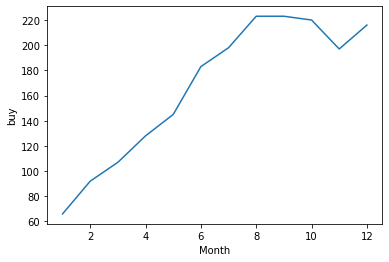

In [20]:
# Importing the matplotlib and seaborn for visualisation
import matplotlib.pyplot as plt, seaborn as sns

# Month wise Buying trend
sns.lineplot(data =lead_train_1.groupby('Month').agg({'buy':'sum'}).reset_index(),x='Month', y='buy');

- The Buying trend of the customers increasing over month wise and observing slight dip on November month
- This seems to be the customers are more likely to buy the product on Winter season

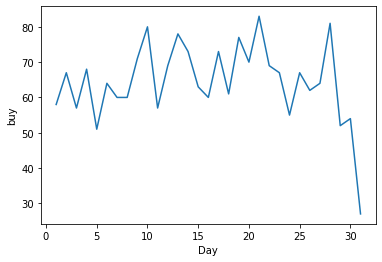

In [21]:
# day wise buying trend

sns.lineplot(data =lead_train_1.groupby('Day').agg({'buy':'sum'}).reset_index(),x='Day', y='buy');

There is no significance difference in entire month except last day of the there is dip in the buying thats may be 31st day is not cosisitant in alla the months

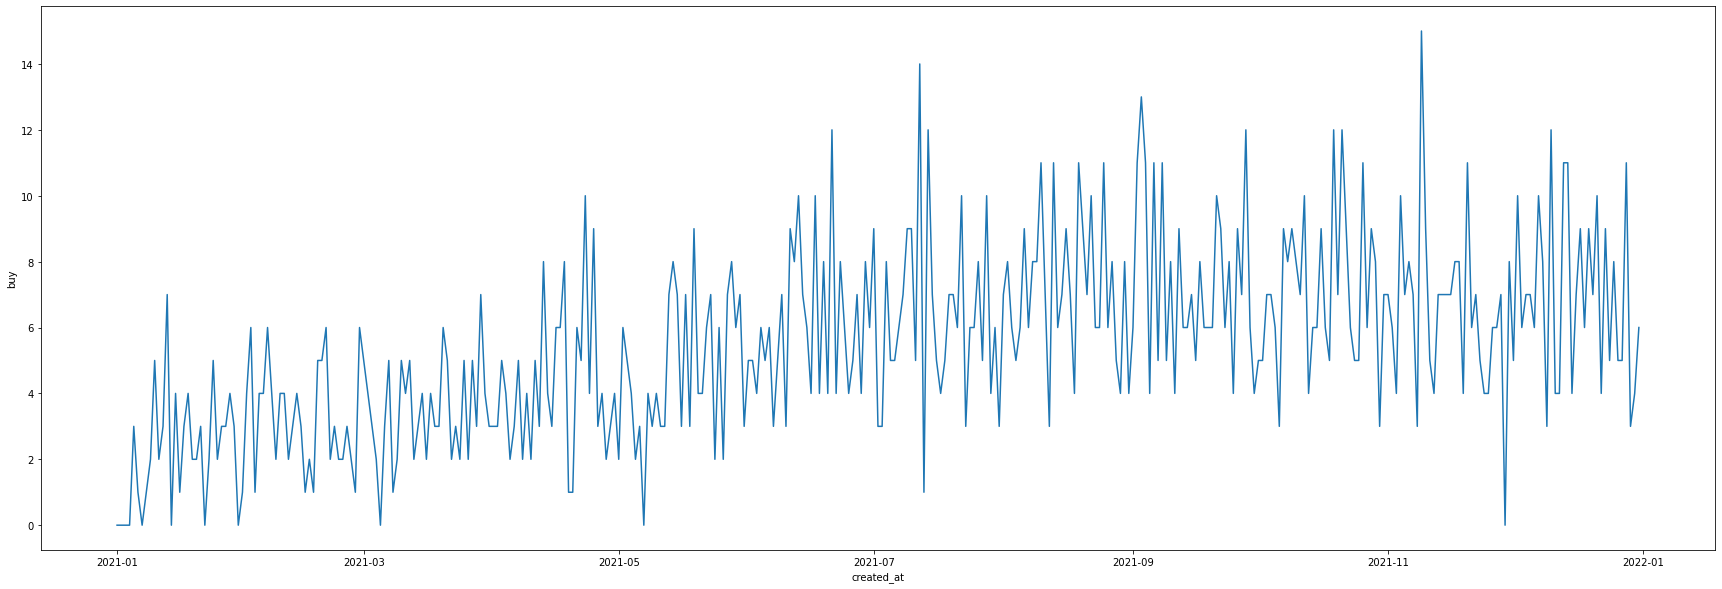

In [22]:
# Entire buying trend throught the year

plt.figure(figsize=(30,10))
sns.lineplot(data =lead_train_1.groupby('created_at').agg({'buy':'sum'}).reset_index(),x='created_at', y='buy');

### <font color=blue>Univariate Analysis</font>

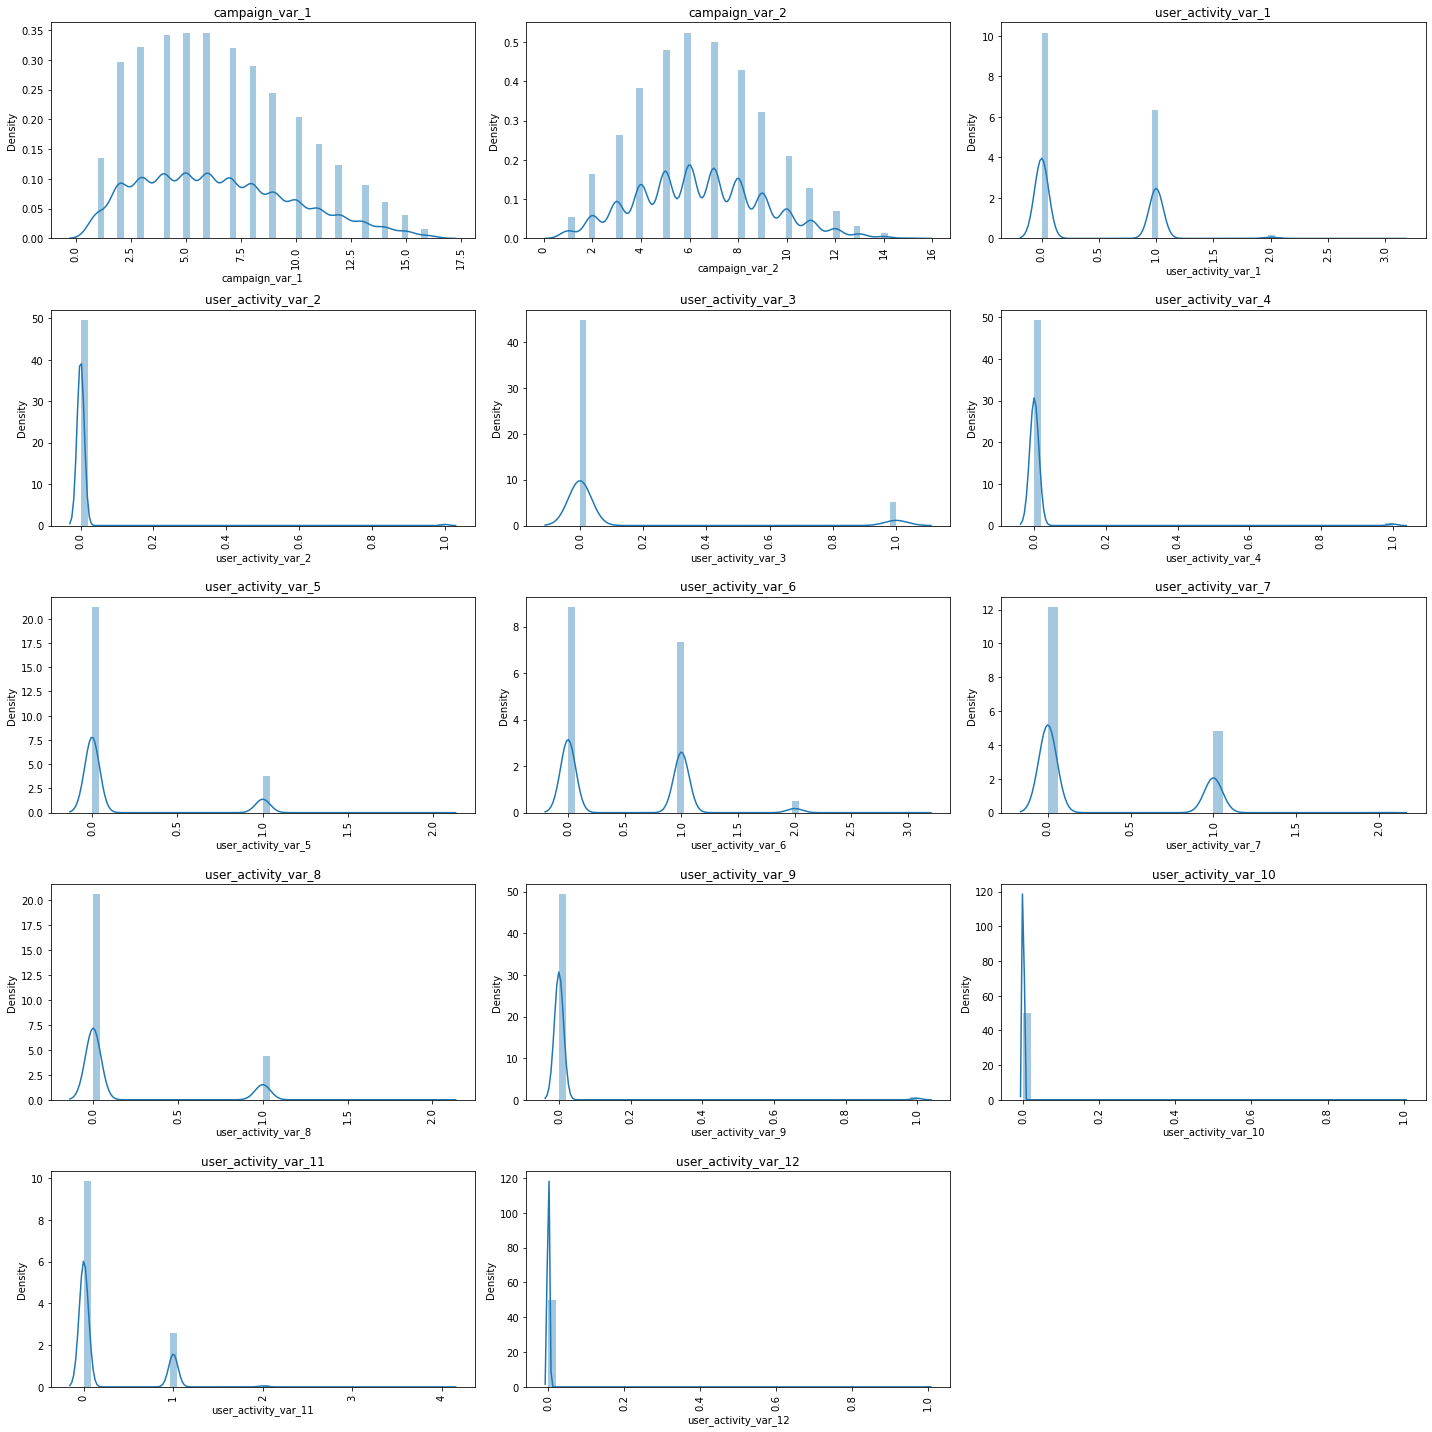

In [23]:
# Distribution of all the columns

plt.figure(figsize=(20,20))
for i in enumerate(lead_train_1.columns[3:17]):
  plt.subplot(5,3,i[0]+1)
  sns.distplot(lead_train_1[i[1]])
  plt.title(i[1])
  plt.xticks(rotation=90)
  plt.tight_layout()

plt.show()

- All the user activity columns are catagorical in nature
- Campaign variables are contionus and normally distributed

In [24]:
# Checking the target (buy) variable

round(lead_train_1.buy.value_counts(normalize=True)*100)

0    95.0
1     5.0
Name: buy, dtype: float64

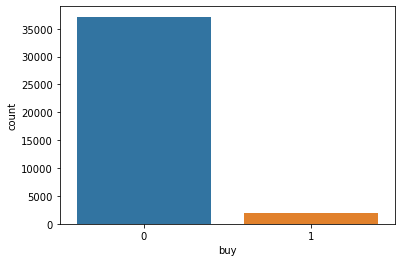

In [25]:
# Plotting the buy column

sns.countplot(lead_train_1.buy);

- There is huge imbalance in the target variable we have to deal with Grid Search Cross Validation to avoit over fitting

### <font color=blue>Bi variate</font>

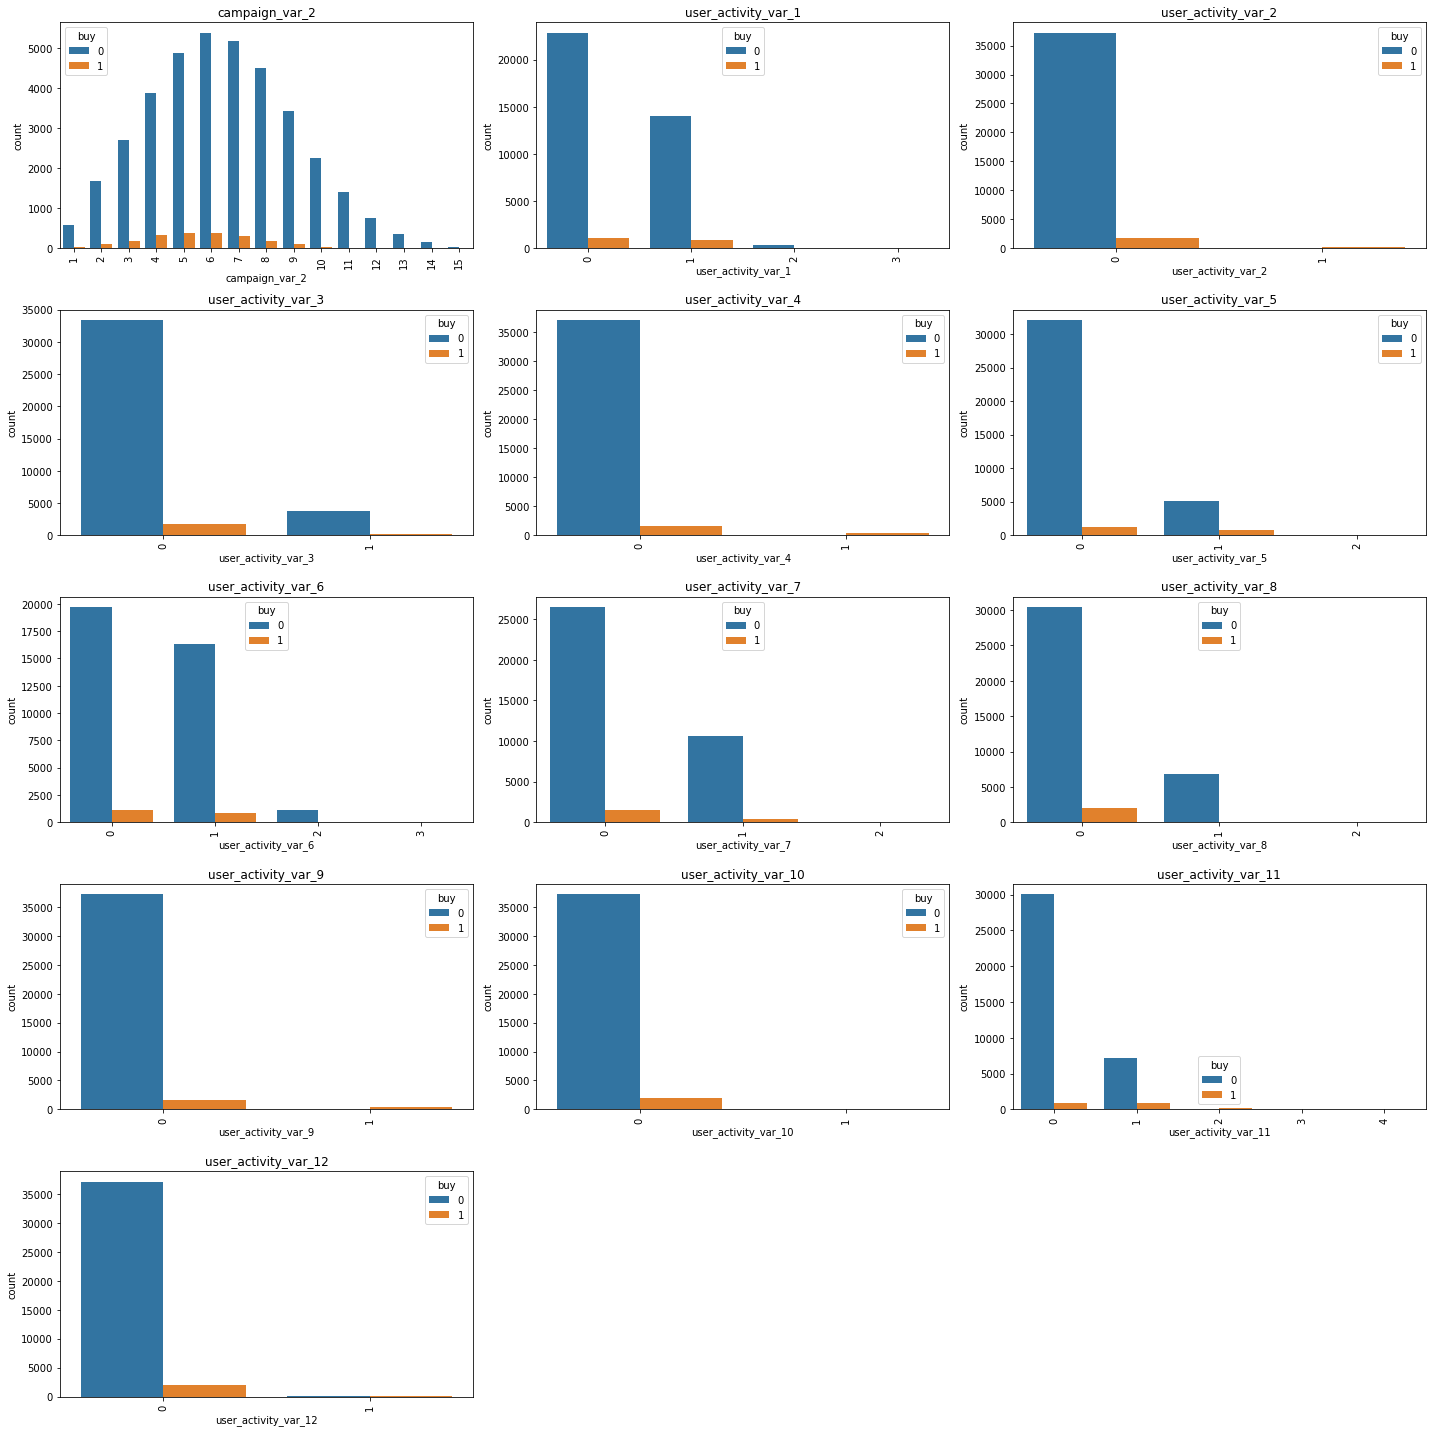

In [26]:
# Checking all the variable in combination with the target variable

plt.figure(figsize=(20,20))
for i in enumerate(lead_train_1.columns[4:17]):
  plt.subplot(5,3,i[0]+1)
  sns.countplot(lead_train_1[i[1]],hue=lead_train_1['buy'])
  plt.title(i[1])
  plt.xticks(rotation=90)
  plt.tight_layout()

plt.show()

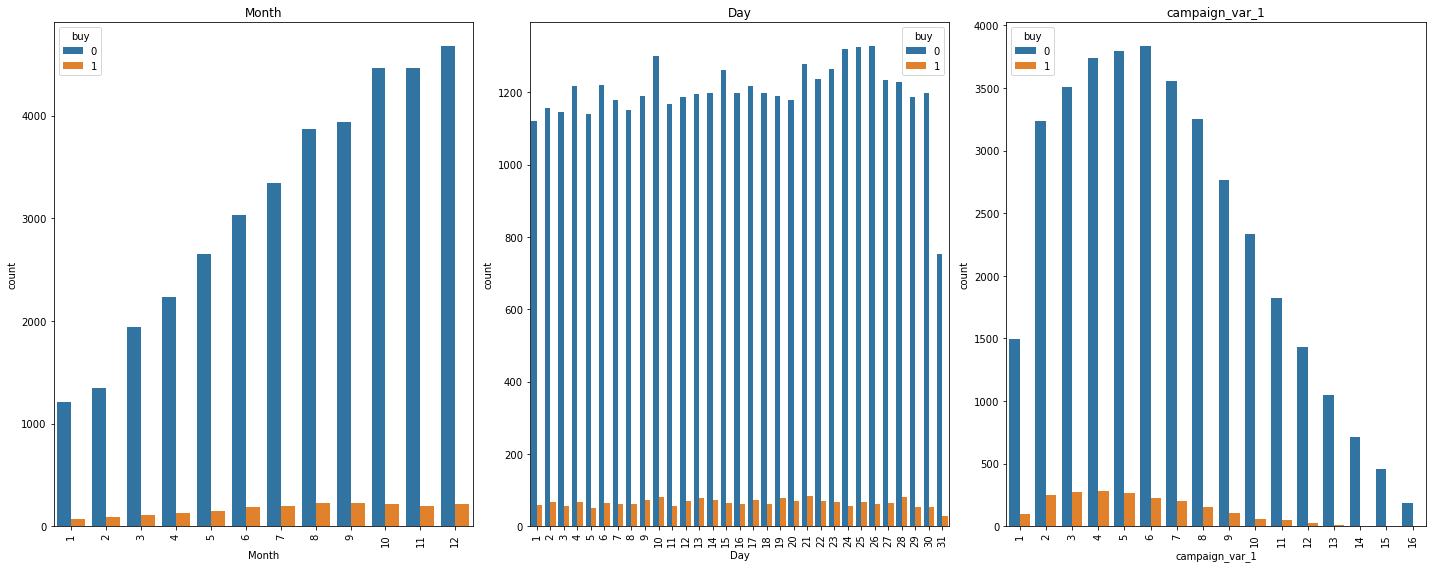

In [27]:
plt.figure(figsize=(20,8))
for i in enumerate(lead_train_1.columns[1:4]):
  plt.subplot(1,3,i[0]+1)
  sns.countplot(lead_train_1[i[1]],hue=lead_train_1['buy'])
  plt.title(i[1])
  plt.xticks(rotation=90)
  plt.tight_layout()

plt.show()

The Buying pattern is same accross all the variable

### <font color=blue>Multi variate Analysis</font>

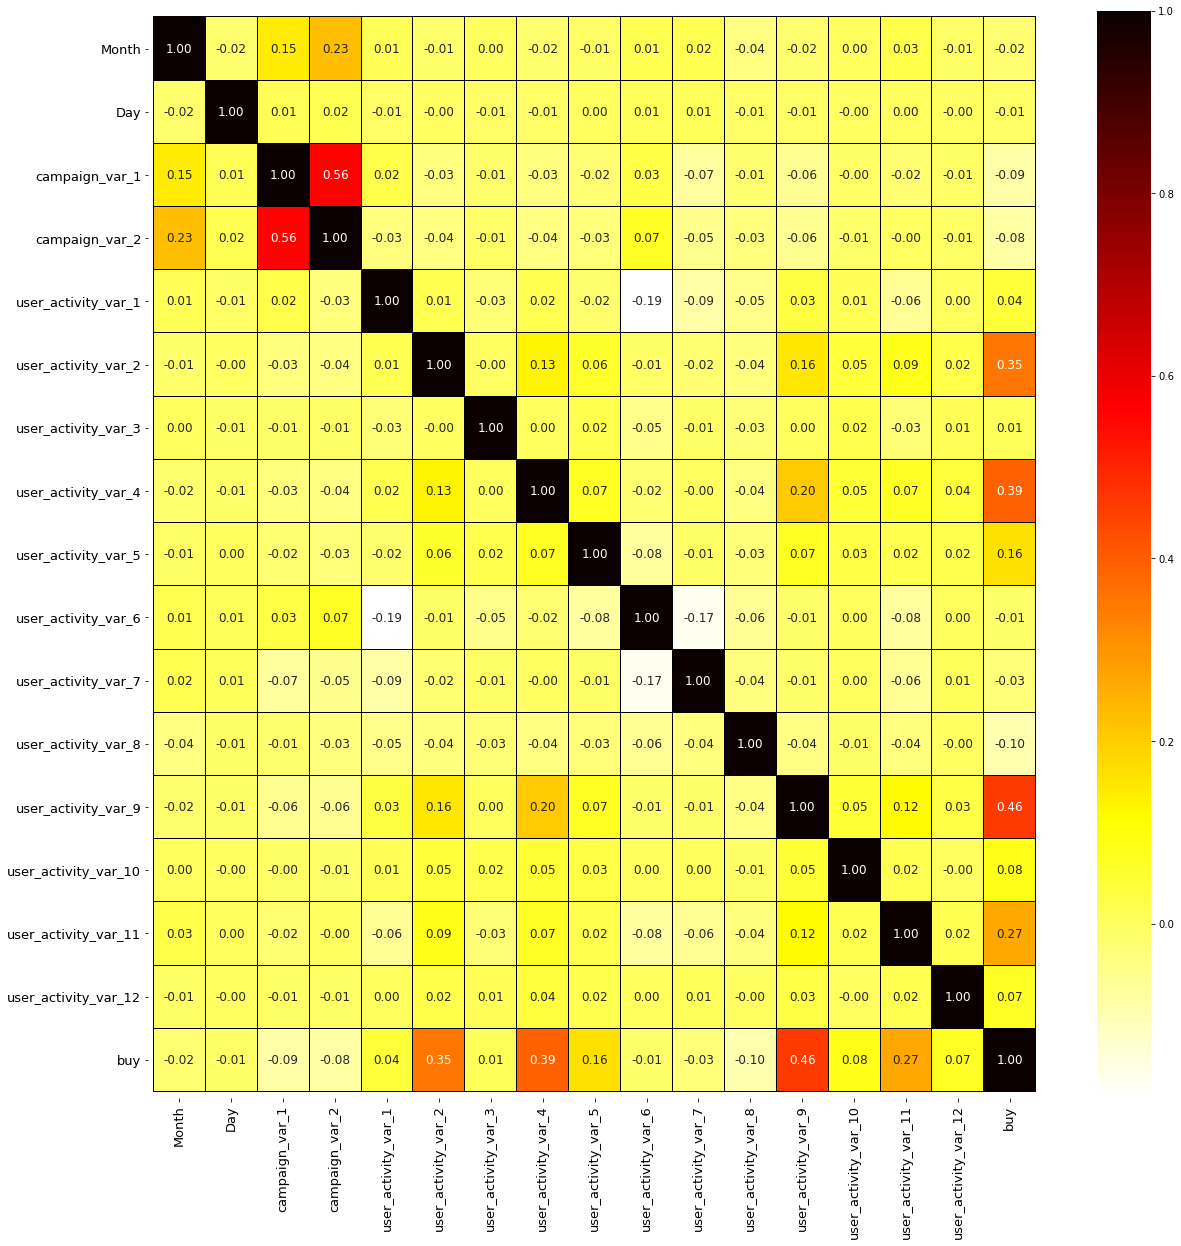

In [28]:
# Checking the correlation among the variables
plt.figure(figsize=(20,20))
plt.tight_layout()

# Plotting the heat map for the correlations
fig = sns.heatmap(lead_train_1.corr(),cmap='hot_r',
            annot=True,linecolor='black',linewidths=0.01,annot_kws={"fontsize":12},fmt="0.2f")

top, bottom = fig.get_ylim()
fig.set_ylim(top+0.1,bottom-0.1)

left, right = fig.get_xlim()
fig.set_xlim(left-0.1,right+0.1) 

plt.yticks(fontsize=13,rotation=0)
plt.xticks(fontsize=13,rotation=90);

- There is no high correlation among the variables

## <font color=blue>Test train split</font>

While experimenting with the various model with various methodology the Model yeilding better result when entire train data being trained by the model so i am continuing with the entire train data for model building

In [29]:
# Creating X and y

X = lead_train_1.drop(['created_at','Month','Day','buy'],1)
y = lead_train_1.buy

The Month and Day columns are adding complexity to the model also the columns are decresing the performance to the model so i am not considering the Month and Day columns

In [30]:
X.head()

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
id,,,,,,,,,,,,,,
1,1,2,0,0,0,0,0,0,1,1,0,0,0,0
2,2,1,1,0,1,0,0,0,1,0,0,0,0,0
3,9,3,1,0,0,0,0,0,0,0,0,0,0,0
4,6,7,0,0,0,0,0,0,0,0,0,0,0,0
5,4,6,0,0,0,0,0,0,1,0,0,0,1,0


In [31]:
y.head()

id
1    0
2    0
3    0
4    0
5    0
Name: buy, dtype: int64

## <font color=blue>Model Building</font>

In [32]:
# Importing AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X, y)

AdaBoostClassifier()

AdaBoost Yielded Better result compared to other models

In [33]:
# creating function for print metics
def print_metrics(y_true,y_pred):
    roc_score = metrics.roc_auc_score(y_true,y_pred)
    Accuracy = metrics.accuracy_score(y_true,y_pred)
    Precision = metrics.precision_score(y_true,y_pred)
    Recall = metrics.recall_score(y_true,y_pred)
    f1_score = metrics.f1_score(y_true,y_pred)
    scores = pd.DataFrame({"Metrics":["Accuracy","ROC_AUC_Score","Precision","Recall","F1_Score"],
                              "Scores":[Accuracy,roc_score,Precision,Recall,f1_score]})
    return scores

In [34]:
# Importing metrics from sklearn

from sklearn import metrics 

y_pred = adb.predict(X)

print_metrics(y,y_pred)

,Metrics,Scores
0,Accuracy,0.975179
1,ROC_AUC_Score,0.769307
2,Precision,0.953180
3,Recall,0.540040
4,F1_Score,0.689457


### <font color=blue>Hyper parameter Tuning</font>

#### <font color=blue>Tuning the `learning_rate`

In [35]:
# Importing GridSearchV
from sklearn.model_selection import GridSearchCV

In [36]:
# Importing GridSearchV
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

# instantiate the model
xgclf = AdaBoostClassifier()

# fit tree on training data
xgclf = GridSearchCV( estimator = xgclf, 
                      param_grid = parameters, 
                      cv = n_folds, 
                      scoring = "f1",
                      return_train_score = True,
                      verbose = 1,
                      refit = True)

xgclf.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]},
             return_train_score=True, scoring='f1', verbose=1)

In [37]:
cv_results = pd.DataFrame(xgclf.cv_results_)
cv_results.sort_values(by="rank_test_score",ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.616999,0.009746,0.037007,0.000004,0.5,{'learning_rate': 0.5},0.666667,0.688103,0.708661,0.691083,...,0.686408,0.014061,1,0.692800,0.687200,0.681416,0.685141,0.687200,0.686751,0.003689
3,0.613337,0.007602,0.037009,0.000635,0.4,{'learning_rate': 0.4},0.662359,0.686084,0.709779,0.692185,...,0.685586,0.015707,2,0.690734,0.685371,0.679047,0.684634,0.686723,0.685302,0.003771
2,0.618544,0.010927,0.038404,0.001960,0.3,{'learning_rate': 0.3},0.660194,0.686084,0.707741,0.688000,...,0.680859,0.017739,3,0.689184,0.681142,0.677445,0.680954,0.681983,0.682142,0.003849
1,0.621618,0.009857,0.038210,0.002406,0.2,{'learning_rate': 0.2},0.638796,0.668863,0.701587,0.673235,...,0.667611,0.020798,4,0.666942,0.667491,0.669378,0.666118,0.671042,0.668194,0.001782
0,0.620793,0.009226,0.037602,0.001745,0.1,{'learning_rate': 0.1},0.498127,0.549729,0.580531,0.563734,...,0.549935,0.027816,5,0.522581,0.562584,0.555205,0.560144,0.559748,0.552052,0.014927


In [38]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'learning_rate': [0.5,1,1.5,2]}

# instantiate the model
xgclf = AdaBoostClassifier()

# fit tree on training data
xgclf = GridSearchCV( estimator = xgclf, 
                      param_grid = parameters, 
                      cv = n_folds, 
                      scoring = "f1",
                      return_train_score = True,
                      verbose = 1,
                      refit = True)

xgclf.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.5, 1, 1.5, 2]},
             return_train_score=True, scoring='f1', verbose=1)

In [39]:
cv_results = pd.DataFrame(xgclf.cv_results_)
cv_results.sort_values(by="rank_test_score",ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.619940,0.028017,0.055408,0.023918,1,{'learning_rate': 1},0.667737,0.686998,0.714734,0.695238,...,0.688876,0.015774,1,0.696172,0.689545,0.680868,0.686950,0.690808,0.688869,0.005005
2,0.627743,0.008682,0.039806,0.003308,1.5,{'learning_rate': 1.5},0.664516,0.684976,0.712716,0.695238,...,0.686994,0.016301,2,0.692585,0.686974,0.680097,0.684866,0.687225,0.686349,0.004033
0,0.626287,0.011151,0.036607,0.000794,0.5,{'learning_rate': 0.5},0.666667,0.688103,0.708661,0.691083,...,0.686408,0.014061,3,0.692800,0.687200,0.681416,0.685141,0.687200,0.686751,0.003689
3,0.613894,0.013215,0.037209,0.000980,2,{'learning_rate': 2},0.119686,0.115734,0.113164,0.114939,...,0.115299,0.002431,4,0.114191,0.115133,0.115785,0.115331,0.115836,0.115255,0.000595


In [40]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'learning_rate': [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5]}

# instantiate the model
xgclf = AdaBoostClassifier()

# fit tree on training data
xgclf = GridSearchCV( estimator = xgclf, 
                      param_grid = parameters, 
                      cv = n_folds, 
                      scoring = "f1",
                      return_train_score = True,
                      verbose = 1,
                      refit = True)

xgclf.fit(X, y)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2,
                                           1.3, 1.4, 1.5]},
             return_train_score=True, scoring='f1', verbose=1)

In [42]:
cv_results = pd.DataFrame(xgclf.cv_results_)
cv_results.sort_values(by="rank_test_score",ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,0.605914,0.006854,0.041409,0.009352,1.1,{'learning_rate': 1.1},0.666667,0.689103,0.716745,0.697306,...,0.689899,0.016855,1,0.695895,0.688995,0.681398,0.686675,0.689270,0.688447,0.004675
7,0.611936,0.004489,0.036812,0.000402,1.2,{'learning_rate': 1.2},0.667737,0.691200,0.714734,0.697306,...,0.689690,0.016240,2,0.696692,0.689243,0.683240,0.686675,0.689243,0.689018,0.004424
4,0.596970,0.002780,0.036430,0.000474,0.9,{'learning_rate': 0.9},0.667737,0.690209,0.712716,0.695238,...,0.689115,0.015112,3,0.694122,0.689545,0.681142,0.687225,0.688747,0.688156,0.004194
3,0.606940,0.007117,0.037009,0.000895,0.8,{'learning_rate': 0.8},0.665595,0.690209,0.712716,0.697306,...,0.689100,0.015922,4,0.692800,0.688498,0.681672,0.687225,0.688747,0.687788,0.003585
5,0.598532,0.004501,0.036206,0.000400,1,{'learning_rate': 1},0.667737,0.686998,0.714734,0.695238,...,0.688876,0.015774,5,0.696172,0.689545,0.680868,0.686950,0.690808,0.688869,0.005005


In [43]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'learning_rate': [1.0,1.02,1.04,1.06,1.08,1.1,1.12,1.14,1.16,1.18,1.2]}

# instantiate the model
xgclf = AdaBoostClassifier()

# fit tree on training data
xgclf = GridSearchCV( estimator = xgclf, 
                      param_grid = parameters, 
                      cv = n_folds, 
                      scoring = "f1",
                      return_train_score = True,
                      verbose = 1,
                      refit = True)

xgclf.fit(X, y)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1.0, 1.02, 1.04, 1.06, 1.08, 1.1,
                                           1.12, 1.14, 1.16, 1.18, 1.2]},
             return_train_score=True, scoring='f1', verbose=1)

In [44]:
cv_results = pd.DataFrame(xgclf.cv_results_)
cv_results.sort_values(by="rank_test_score",ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
9,0.602934,0.011378,0.035608,0.000491,1.18,{'learning_rate': 1.18},0.667737,0.691200,0.717868,0.695238,...,0.689903,0.017077,1,0.696692,0.689765,0.681672,0.686950,0.688969,0.688809,0.004847
5,0.614513,0.011997,0.037814,0.000980,1.1,{'learning_rate': 1.1},0.666667,0.689103,0.716745,0.697306,...,0.689899,0.016855,2,0.695895,0.688995,0.681398,0.686675,0.689270,0.688447,0.004675
6,0.615734,0.012749,0.037009,0.000633,1.12,{'learning_rate': 1.12},0.666667,0.689103,0.716745,0.697306,...,0.689899,0.016855,2,0.695895,0.688995,0.681124,0.686424,0.689022,0.688292,0.004769
2,0.617833,0.013445,0.038208,0.000747,1.04,{'learning_rate': 1.04},0.666667,0.691200,0.714734,0.696203,...,0.689696,0.016138,4,0.695895,0.690315,0.680868,0.686675,0.688995,0.688550,0.004895
3,0.612336,0.012034,0.037409,0.001014,1.06,{'learning_rate': 1.06},0.666667,0.691200,0.714734,0.696203,...,0.689696,0.016138,4,0.695895,0.689545,0.681672,0.686400,0.688721,0.688447,0.004623
10,0.630260,0.028844,0.037010,0.001549,1.2,{'learning_rate': 1.2},0.667737,0.691200,0.714734,0.697306,...,0.689690,0.016240,6,0.696692,0.689243,0.683240,0.686675,0.689243,0.689018,0.004424
4,0.618142,0.013956,0.038209,0.002925,1.08,{'learning_rate': 1.08},0.666667,0.689103,0.714734,0.697306,...,0.689497,0.016222,7,0.695895,0.688995,0.681398,0.686675,0.688721,0.688337,0.004661
1,0.610798,0.005764,0.037413,0.000801,1.02,{'learning_rate': 1.02},0.667737,0.691200,0.714734,0.694136,...,0.689496,0.015693,8,0.696172,0.690590,0.681928,0.686675,0.689270,0.688927,0.004678
0,0.615951,0.011194,0.037808,0.000749,1,{'learning_rate': 1.0},0.667737,0.686998,0.714734,0.695238,...,0.688876,0.015774,9,0.696172,0.689545,0.680868,0.686950,0.690808,0.688869,0.005005
7,0.614740,0.013843,0.037604,0.000800,1.14,{'learning_rate': 1.14},0.664526,0.689103,0.714734,0.697306,...,0.688848,0.016964,10,0.695895,0.689518,0.681654,0.686424,0.689270,0.688552,0.004636


In [45]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'learning_rate': [1.16,1.17,1.18,1.19,1.2]}

# instantiate the model
xgclf = AdaBoostClassifier()

# fit tree on training data
xgclf = GridSearchCV( estimator = xgclf, 
                      param_grid = parameters, 
                      cv = n_folds, 
                      scoring = "f1",
                      return_train_score = True,
                      verbose = 1,
                      refit = True)

xgclf.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1.16, 1.17, 1.18, 1.19, 1.2]},
             return_train_score=True, scoring='f1', verbose=1)

In [46]:
cv_results = pd.DataFrame(xgclf.cv_results_)
cv_results.sort_values(by="rank_test_score",ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,0.607002,0.003508,0.037409,0.001015,1.18,{'learning_rate': 1.18},0.667737,0.691200,0.717868,0.695238,...,0.689903,0.017077,1,0.696692,0.689765,0.681672,0.686950,0.688969,0.688809,0.004847
3,0.611770,0.005855,0.037205,0.000978,1.19,{'learning_rate': 1.19},0.667737,0.691200,0.714734,0.697306,...,0.689690,0.016240,2,0.696172,0.689243,0.681928,0.686675,0.689243,0.688652,0.004613
4,0.618134,0.009314,0.037008,0.000634,1.2,{'learning_rate': 1.2},0.667737,0.691200,0.714734,0.697306,...,0.689690,0.016240,2,0.696692,0.689243,0.683240,0.686675,0.689243,0.689018,0.004424
0,0.618744,0.007630,0.037204,0.000749,1.16,{'learning_rate': 1.16},0.662379,0.686998,0.716745,0.697306,...,0.688400,0.018212,4,0.696172,0.688995,0.681398,0.685371,0.689243,0.688236,0.004890
1,0.609912,0.003916,0.038007,0.000630,1.17,{'learning_rate': 1.17},0.662379,0.684887,0.714734,0.697306,...,0.687576,0.017637,5,0.695930,0.688995,0.683240,0.686675,0.689793,0.688926,0.004176


In [47]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'learning_rate': [1.18,1.182,1.184,1.186,1.188,1.19,1.192,1.194,1.196,1.198,1.2]}

# instantiate the model
xgclf = AdaBoostClassifier()

# fit tree on training data
xgclf = GridSearchCV( estimator = xgclf, 
                      param_grid = parameters, 
                      cv = n_folds, 
                      scoring = "f1",
                      return_train_score = True,
                      verbose = 1,
                      refit = True)

xgclf.fit(X, y)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1.18, 1.182, 1.184, 1.186, 1.188,
                                           1.19, 1.192, 1.194, 1.196, 1.198,
                                           1.2]},
             return_train_score=True, scoring='f1', verbose=1)

In [48]:
cv_results = pd.DataFrame(xgclf.cv_results_)
cv_results.sort_values(by="rank_test_score",ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.621141,0.024258,0.042010,0.011009,1.182,{'learning_rate': 1.182},0.667737,0.6912,0.717868,0.699367,...,0.690729,0.017411,1,0.696692,0.689765,0.681672,0.686400,0.688969,0.688700,0.004894
2,0.592332,0.002311,0.035610,0.000494,1.184,{'learning_rate': 1.184},0.667737,0.6912,0.717868,0.699367,...,0.690729,0.017411,1,0.696692,0.689765,0.681672,0.686400,0.689243,0.688754,0.004898
3,0.596935,0.006243,0.035422,0.000507,1.186,{'learning_rate': 1.186},0.666667,0.6912,0.717868,0.699367,...,0.690515,0.017697,3,0.695895,0.689243,0.682202,0.686400,0.689243,0.688597,0.004468
4,0.604175,0.006967,0.039405,0.006310,1.188,{'learning_rate': 1.188},0.667737,0.6912,0.717868,0.697306,...,0.690317,0.017225,4,0.696172,0.689243,0.682202,0.686675,0.689243,0.688707,0.004533
0,0.627342,0.023907,0.036721,0.000890,1.18,{'learning_rate': 1.18},0.667737,0.6912,0.717868,0.695238,...,0.689903,0.017077,5,0.696692,0.689765,0.681672,0.686950,0.688969,0.688809,0.004847
5,0.610878,0.005240,0.037604,0.001857,1.19,{'learning_rate': 1.19},0.667737,0.6912,0.714734,0.697306,...,0.689690,0.016240,6,0.696172,0.689243,0.681928,0.686675,0.689243,0.688652,0.004613
6,0.611736,0.006949,0.036814,0.000403,1.192,{'learning_rate': 1.192},0.667737,0.6912,0.714734,0.697306,...,0.689690,0.016240,6,0.696172,0.689243,0.681928,0.687200,0.689243,0.688757,0.004572
10,0.616980,0.007618,0.036607,0.000804,1.2,{'learning_rate': 1.2},0.667737,0.6912,0.714734,0.697306,...,0.689690,0.016240,6,0.696692,0.689243,0.683240,0.686675,0.689243,0.689018,0.004424
7,0.626029,0.010985,0.040003,0.007020,1.194,{'learning_rate': 1.194},0.667737,0.6912,0.714734,0.695238,...,0.689276,0.016066,9,0.696172,0.689243,0.682712,0.687475,0.689243,0.688969,0.004323
8,0.611134,0.009526,0.036608,0.000490,1.196,{'learning_rate': 1.196},0.667737,0.6912,0.714734,0.695238,...,0.689276,0.016066,9,0.696172,0.689243,0.682712,0.687475,0.689243,0.688969,0.004323


In [49]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'learning_rate': [1.18,1.1805,1.181,1.1815,1.182,1.1825,1.185]}

# instantiate the model
xgclf = AdaBoostClassifier()

# fit tree on training data
xgclf = GridSearchCV( estimator = xgclf, 
                      param_grid = parameters, 
                      cv = n_folds, 
                      scoring = "f1",
                      return_train_score = True,
                      verbose = 1,
                      refit = True)

xgclf.fit(X, y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1.18, 1.1805, 1.181, 1.1815, 1.182,
                                           1.1825, 1.185]},
             return_train_score=True, scoring='f1', verbose=1)

In [50]:
cv_results = pd.DataFrame(xgclf.cv_results_)
cv_results.sort_values(by="rank_test_score",ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.633348,0.002317,0.036608,0.000487,1.182,{'learning_rate': 1.182},0.667737,0.6912,0.717868,0.699367,...,0.690729,0.017411,1,0.696692,0.689765,0.681672,0.686400,0.688969,0.688700,0.004894
5,0.625142,0.014703,0.036607,0.000489,1.1825,{'learning_rate': 1.1825},0.667737,0.6912,0.717868,0.699367,...,0.690729,0.017411,1,0.696692,0.689765,0.681672,0.686400,0.689243,0.688754,0.004898
6,0.608127,0.001676,0.037011,0.001550,1.185,{'learning_rate': 1.185},0.666667,0.6912,0.717868,0.699367,...,0.690515,0.017697,3,0.695895,0.689243,0.681672,0.686400,0.689243,0.688491,0.004622
2,0.634337,0.004538,0.036614,0.000790,1.181,{'learning_rate': 1.181},0.667737,0.6912,0.717868,0.697306,...,0.690317,0.017225,4,0.696692,0.689765,0.681672,0.686675,0.688969,0.688754,0.004869
3,0.632730,0.004035,0.036007,0.000010,1.1815,{'learning_rate': 1.1815},0.667737,0.6912,0.717868,0.697306,...,0.690317,0.017225,4,0.696692,0.689765,0.681672,0.686675,0.688969,0.688754,0.004869
0,0.617142,0.019027,0.036403,0.000489,1.18,{'learning_rate': 1.18},0.667737,0.6912,0.717868,0.695238,...,0.689903,0.017077,6,0.696692,0.689765,0.681672,0.686950,0.688969,0.688809,0.004847
1,0.633348,0.003659,0.036004,0.000008,1.1805,{'learning_rate': 1.1805},0.667737,0.6912,0.717868,0.695238,...,0.689903,0.017077,6,0.696692,0.689765,0.681672,0.686950,0.688969,0.688809,0.004847


#### <font color=blue>Tuning the `n_estimators`

In [76]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators':[100,110,120,150]}

# instantiate the model
xgclf = AdaBoostClassifier(  learning_rate=1.182)

# fit tree on training data
xgclf = GridSearchCV( estimator = xgclf, 
                      param_grid = parameters, 
                      cv = n_folds, 
                      scoring = "f1",
                      return_train_score = True,
                      verbose = 1,
                      refit = True)

xgclf.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(learning_rate=1.182),
             param_grid={'n_estimators': [100, 110, 120, 150]},
             return_train_score=True, scoring='f1', verbose=1)

In [77]:
cv_results = pd.DataFrame(xgclf.cv_results_)
cv_results.sort_values(by="rank_test_score",ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.221905,0.013623,0.071414,0.001854,100,{'n_estimators': 100},0.666667,0.6912,0.712716,0.695238,...,0.689099,0.015439,1,0.695895,0.690068,0.681928,0.686675,0.690562,0.689025,0.004616
1,1.369334,0.015536,0.079213,0.002035,110,{'n_estimators': 110},0.666667,0.6912,0.712716,0.695238,...,0.689099,0.015439,1,0.695895,0.690068,0.681928,0.686675,0.690837,0.689080,0.004636
2,1.480935,0.011295,0.085416,0.002500,120,{'n_estimators': 120},0.666667,0.6912,0.712716,0.695238,...,0.689099,0.015439,1,0.695895,0.689793,0.681928,0.686400,0.690562,0.688915,0.004633
3,1.893523,0.056225,0.107422,0.004177,150,{'n_estimators': 150},0.666667,0.6912,0.712716,0.695238,...,0.689099,0.015439,1,0.695895,0.689793,0.681928,0.686400,0.690562,0.688915,0.004633


In [78]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators':[50,100,150]}

# instantiate the model
xgclf = AdaBoostClassifier(  learning_rate=1.182)

# fit tree on training data
xgclf = GridSearchCV( estimator = xgclf, 
                      param_grid = parameters, 
                      cv = n_folds, 
                      scoring = "f1",
                      return_train_score = True,
                      verbose = 1,
                      refit = True)

xgclf.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(learning_rate=1.182),
             param_grid={'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='f1', verbose=1)

In [79]:
cv_results = pd.DataFrame(xgclf.cv_results_)
cv_results.sort_values(by="rank_test_score",ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.621323,0.015675,0.039011,0.003578,50,{'n_estimators': 50},0.667737,0.6912,0.717868,0.699367,...,0.690729,0.017411,1,0.696692,0.689765,0.681672,0.686400,0.688969,0.688700,0.004894
1,1.214599,0.007337,0.069611,0.000798,100,{'n_estimators': 100},0.666667,0.6912,0.712716,0.695238,...,0.689099,0.015439,2,0.695895,0.690068,0.681928,0.686675,0.690562,0.689025,0.004616
2,1.806903,0.013287,0.101623,0.001855,150,{'n_estimators': 150},0.666667,0.6912,0.712716,0.695238,...,0.689099,0.015439,2,0.695895,0.689793,0.681928,0.686400,0.690562,0.688915,0.004633


In [80]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators':[25,50,75,100]}

# instantiate the model
xgclf = AdaBoostClassifier(learning_rate=1.182)

# fit tree on training data
xgclf = GridSearchCV( estimator = xgclf, 
                      param_grid = parameters, 
                      cv = n_folds, 
                      scoring = "f1",
                      return_train_score = True,
                      verbose = 1,
                      refit = True)

xgclf.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(learning_rate=1.182),
             param_grid={'n_estimators': [25, 50, 75, 100]},
             return_train_score=True, scoring='f1', verbose=1)

In [81]:
cv_results = pd.DataFrame(xgclf.cv_results_)
cv_results.sort_values(by="rank_test_score",ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.616807,0.011036,0.038609,0.003263,50,{'n_estimators': 50},0.667737,0.691200,0.717868,0.699367,...,0.690729,0.017411,1,0.696692,0.689765,0.681672,0.686400,0.688969,0.688700,0.004894
2,0.931606,0.018042,0.055411,0.002585,75,{'n_estimators': 75},0.666667,0.691200,0.712716,0.695238,...,0.689099,0.015439,2,0.696172,0.690068,0.681928,0.686950,0.690287,0.689081,0.004657
3,1.237440,0.017702,0.074558,0.003732,100,{'n_estimators': 100},0.666667,0.691200,0.712716,0.695238,...,0.689099,0.015439,2,0.695895,0.690068,0.681928,0.686675,0.690562,0.689025,0.004616
0,0.327678,0.012325,0.023006,0.001894,25,{'n_estimators': 25},0.660225,0.686998,0.717868,0.692063,...,0.685202,0.020043,4,0.695132,0.686376,0.679276,0.685416,0.687225,0.686685,0.005064


In [82]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators':[30,40,50,60,70]}

# instantiate the model
xgclf = AdaBoostClassifier(learning_rate=1.182)

# fit tree on training data
xgclf = GridSearchCV( estimator = xgclf, 
                      param_grid = parameters, 
                      cv = n_folds, 
                      scoring = "f1",
                      return_train_score = True,
                      verbose = 1,
                      refit = True)

xgclf.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(learning_rate=1.182),
             param_grid={'n_estimators': [30, 40, 50, 60, 70]},
             return_train_score=True, scoring='f1', verbose=1)

In [83]:
cv_results = pd.DataFrame(xgclf.cv_results_)
cv_results.sort_values(by="rank_test_score",ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,0.605222,0.004137,0.036612,0.000801,50,{'n_estimators': 50},0.667737,0.69120,0.717868,0.699367,...,0.690729,0.017411,1,0.696692,0.689765,0.681672,0.686400,0.688969,0.688700,0.004894
4,0.848342,0.008258,0.050420,0.000817,70,{'n_estimators': 70},0.667737,0.69120,0.712716,0.695238,...,0.689313,0.015131,2,0.696172,0.690590,0.681928,0.686950,0.690012,0.689130,0.004672
3,0.720118,0.001670,0.043016,0.000631,60,{'n_estimators': 60},0.667737,0.69120,0.712716,0.695238,...,0.689092,0.015278,3,0.696172,0.690315,0.681398,0.686675,0.690808,0.689074,0.004891
1,0.484929,0.005367,0.029807,0.000397,40,{'n_estimators': 40},0.662379,0.68599,0.716745,0.697306,...,0.687978,0.018353,4,0.694122,0.689270,0.681654,0.686675,0.688969,0.688138,0.004049
0,0.373865,0.009625,0.023206,0.000399,30,{'n_estimators': 30},0.660225,0.68599,0.717868,0.697306,...,0.687351,0.019553,5,0.692277,0.688446,0.681142,0.686196,0.688525,0.687317,0.003653


In [84]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators':[40,45,50,55,60,65,70]}

# instantiate the model
xgclf = AdaBoostClassifier(learning_rate=1.182)

# fit tree on training data
xgclf = GridSearchCV( estimator = xgclf, 
                      param_grid = parameters, 
                      cv = n_folds, 
                      scoring = "f1",
                      return_train_score = True,
                      verbose = 1,
                      refit = True)

xgclf.fit(X, y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(learning_rate=1.182),
             param_grid={'n_estimators': [40, 45, 50, 55, 60, 65, 70]},
             return_train_score=True, scoring='f1', verbose=1)

In [85]:
cv_results = pd.DataFrame(xgclf.cv_results_)
cv_results.sort_values(by="rank_test_score",ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,0.608331,0.005109,0.037414,0.001355,50,{'n_estimators': 50},0.667737,0.69120,0.717868,0.699367,...,0.690729,0.017411,1,0.696692,0.689765,0.681672,0.686400,0.688969,0.688700,0.004894
3,0.663646,0.002895,0.040411,0.001023,55,{'n_estimators': 55},0.667737,0.69120,0.714734,0.697306,...,0.689690,0.016240,2,0.696172,0.689765,0.681654,0.686675,0.688969,0.688647,0.004707
1,0.545794,0.003213,0.034807,0.000747,45,{'n_estimators': 45},0.667737,0.68599,0.717868,0.699367,...,0.689687,0.017508,3,0.695652,0.688747,0.682457,0.686400,0.688969,0.688445,0.004298
5,0.781791,0.002569,0.046811,0.000749,65,{'n_estimators': 65},0.667737,0.69120,0.712716,0.695238,...,0.689313,0.015131,4,0.696172,0.690590,0.681398,0.686950,0.690012,0.689024,0.004837
6,0.847795,0.012077,0.050606,0.000483,70,{'n_estimators': 70},0.667737,0.69120,0.712716,0.695238,...,0.689313,0.015131,4,0.696172,0.690590,0.681928,0.686950,0.690012,0.689130,0.004672
4,0.722760,0.006065,0.043017,0.000627,60,{'n_estimators': 60},0.667737,0.69120,0.712716,0.695238,...,0.689092,0.015278,6,0.696172,0.690315,0.681398,0.686675,0.690808,0.689074,0.004891
0,0.500768,0.014466,0.031204,0.001164,40,{'n_estimators': 40},0.662379,0.68599,0.716745,0.697306,...,0.687978,0.018353,7,0.694122,0.689270,0.681654,0.686675,0.688969,0.688138,0.004049


In [86]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators':[45,46,47,48,49,50,51,52,53,54,55]}

# instantiate the model
xgclf = AdaBoostClassifier(learning_rate=1.182)

# fit tree on training data
xgclf = GridSearchCV( estimator = xgclf, 
                      param_grid = parameters, 
                      cv = n_folds, 
                      scoring = "f1",
                      return_train_score = True,
                      verbose = 1,
                      refit = True)

xgclf.fit(X, y)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(learning_rate=1.182),
             param_grid={'n_estimators': [45, 46, 47, 48, 49, 50, 51, 52, 53,
                                          54, 55]},
             return_train_score=True, scoring='f1', verbose=1)

In [87]:
cv_results = pd.DataFrame(xgclf.cv_results_)
cv_results.sort_values(by="rank_test_score",ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.593732,0.002054,0.037006,0.000635,49,{'n_estimators': 49},0.667737,0.691200,0.717868,0.699367,...,0.690729,0.017411,1,0.696692,0.689765,0.681672,0.686400,0.688969,0.688700,0.004894
5,0.607615,0.001741,0.037408,0.000490,50,{'n_estimators': 50},0.667737,0.691200,0.717868,0.699367,...,0.690729,0.017411,1,0.696692,0.689765,0.681672,0.686400,0.688969,0.688700,0.004894
1,0.563361,0.002606,0.034446,0.000784,46,{'n_estimators': 46},0.667737,0.689103,0.717868,0.699367,...,0.690309,0.017420,3,0.695652,0.689765,0.682457,0.686925,0.688969,0.688754,0.004281
2,0.573736,0.003613,0.035201,0.000744,47,{'n_estimators': 47},0.667737,0.689103,0.717868,0.699367,...,0.690309,0.017420,3,0.695652,0.689765,0.681672,0.686925,0.691054,0.689014,0.004627
6,0.619029,0.004145,0.039409,0.003322,51,{'n_estimators': 51},0.667737,0.691200,0.716745,0.697306,...,0.690092,0.016868,5,0.696172,0.689765,0.682712,0.686675,0.688969,0.688858,0.004402
7,0.628143,0.001409,0.038011,0.000636,52,{'n_estimators': 52},0.667737,0.691200,0.716745,0.697306,...,0.690092,0.016868,5,0.696172,0.689765,0.682712,0.686675,0.688969,0.688858,0.004402
8,0.642143,0.006154,0.039406,0.001348,53,{'n_estimators': 53},0.667737,0.691200,0.716745,0.697306,...,0.690092,0.016868,5,0.696172,0.689765,0.681654,0.686675,0.688969,0.688647,0.004707
9,0.651965,0.001815,0.039992,0.000634,54,{'n_estimators': 54},0.667737,0.691200,0.716745,0.697306,...,0.690092,0.016868,5,0.696172,0.689765,0.681654,0.686675,0.688969,0.688647,0.004707
3,0.581900,0.002289,0.036032,0.000582,48,{'n_estimators': 48},0.667737,0.689103,0.715856,0.699367,...,0.689907,0.016791,9,0.696692,0.689765,0.681928,0.686400,0.688969,0.688751,0.004821
10,0.672537,0.008906,0.041209,0.000748,55,{'n_estimators': 55},0.667737,0.691200,0.714734,0.697306,...,0.689690,0.016240,10,0.696172,0.689765,0.681654,0.686675,0.688969,0.688647,0.004707


#### <font color=blue>Tuning the `algorithm`

In [88]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'algorithm':['SAMME', 'SAMME.R']}

# instantiate the model
xgclf = AdaBoostClassifier( learning_rate=1.182,
                            n_estimators=50)

# fit tree on training data
xgclf = GridSearchCV( estimator = xgclf, 
                      param_grid = parameters, 
                      cv = n_folds, 
                      scoring = "f1",
                      return_train_score = True,
                      verbose = 1,
                      refit = True)

xgclf.fit(X, y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(learning_rate=1.182),
             param_grid={'algorithm': ['SAMME', 'SAMME.R']},
             return_train_score=True, scoring='f1', verbose=1)

In [89]:
cv_results = pd.DataFrame(xgclf.cv_results_)
cv_results.sort_values(by="rank_test_score",ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.633121,0.019267,0.038611,0.000492,SAMME.R,{'algorithm': 'SAMME.R'},0.667737,0.691200,0.717868,0.699367,...,0.690729,0.017411,1,0.696692,0.689765,0.681672,0.686400,0.688969,0.688700,0.004894
0,0.519151,0.020169,0.021006,0.000637,SAMME,{'algorithm': 'SAMME'},0.598261,0.620926,0.607945,0.588028,...,0.596603,0.018016,2,0.634705,0.623877,0.601131,0.583627,0.587977,0.606263,0.019962


### <font color=blue>Final Model with best parameters

In [90]:
xgclf = AdaBoostClassifier( learning_rate=1.182,
                            n_estimators=50)

xgclf.fit(X, y)

AdaBoostClassifier(learning_rate=1.182)

In [91]:
y_pred = xgclf.predict(X)

print_metrics(y,y_pred)

,Metrics,Scores
0,Accuracy,0.975103
1,ROC_AUC_Score,0.769267
2,Precision,0.950661
3,Recall,0.540040
4,F1_Score,0.688797


## <font color=blue>Predicting the unseen (test data)

In [92]:
# unseen data
lead_test.head()

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
id,,,,,,,,,,,,,,,,,
39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# dropping the products_purchased and signup_date
lead_test = lead_test.drop(['products_purchased','signup_date'],1)

lead_test.head()

,created_at,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
id,,,,,,,,,,,,,,,
39162,2022-01-01,2,2,1,1,0,0,0,1,0,0,0,0,1,0
39163,2022-01-01,4,7,1,0,0,0,0,0,0,1,0,0,0,0
39164,2022-01-01,8,7,0,0,0,0,1,1,0,0,0,0,0,0
39165,2022-01-01,9,8,0,0,0,0,1,1,1,0,0,0,2,0
39166,2022-01-01,4,5,1,0,0,0,0,0,0,0,0,0,0,0


In [94]:
lead_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13184 entries, 39162 to 52345
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   created_at            13184 non-null  object
 1   campaign_var_1        13184 non-null  int64 
 2   campaign_var_2        13184 non-null  int64 
 3   user_activity_var_1   13184 non-null  int64 
 4   user_activity_var_2   13184 non-null  int64 
 5   user_activity_var_3   13184 non-null  int64 
 6   user_activity_var_4   13184 non-null  int64 
 7   user_activity_var_5   13184 non-null  int64 
 8   user_activity_var_6   13184 non-null  int64 
 9   user_activity_var_7   13184 non-null  int64 
 10  user_activity_var_8   13184 non-null  int64 
 11  user_activity_var_9   13184 non-null  int64 
 12  user_activity_var_10  13184 non-null  int64 
 13  user_activity_var_11  13184 non-null  int64 
 14  user_activity_var_12  13184 non-null  int64 
dtypes: int64(14), object(1)
memory u

In [95]:
# Converting the created_at to date time format
lead_test.created_at = pd.to_datetime(lead_test.created_at)

lead_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13184 entries, 39162 to 52345
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   created_at            13184 non-null  datetime64[ns]
 1   campaign_var_1        13184 non-null  int64         
 2   campaign_var_2        13184 non-null  int64         
 3   user_activity_var_1   13184 non-null  int64         
 4   user_activity_var_2   13184 non-null  int64         
 5   user_activity_var_3   13184 non-null  int64         
 6   user_activity_var_4   13184 non-null  int64         
 7   user_activity_var_5   13184 non-null  int64         
 8   user_activity_var_6   13184 non-null  int64         
 9   user_activity_var_7   13184 non-null  int64         
 10  user_activity_var_8   13184 non-null  int64         
 11  user_activity_var_9   13184 non-null  int64         
 12  user_activity_var_10  13184 non-null  int64         
 13  user_activit

In [96]:
lead_test.insert(loc=1,column="Month",value=pd.DatetimeIndex(lead_test.created_at).month)

lead_test.insert(loc=2,column="Day",value=pd.DatetimeIndex(lead_test.created_at).day)

lead_test.head()

,created_at,Month,Day,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
id,,,,,,,,,,,,,,,,,
39162,2022-01-01,1,1,2,2,1,1,0,0,0,1,0,0,0,0,1,0
39163,2022-01-01,1,1,4,7,1,0,0,0,0,0,0,1,0,0,0,0
39164,2022-01-01,1,1,8,7,0,0,0,0,1,1,0,0,0,0,0,0
39165,2022-01-01,1,1,9,8,0,0,0,0,1,1,1,0,0,0,2,0
39166,2022-01-01,1,1,4,5,1,0,0,0,0,0,0,0,0,0,0,0


In [97]:
lead_test = lead_test.drop('created_at',1)

lead_test.head()

,Month,Day,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
id,,,,,,,,,,,,,,,,
39162,1,1,2,2,1,1,0,0,0,1,0,0,0,0,1,0
39163,1,1,4,7,1,0,0,0,0,0,0,1,0,0,0,0
39164,1,1,8,7,0,0,0,0,1,1,0,0,0,0,0,0
39165,1,1,9,8,0,0,0,0,1,1,1,0,0,0,2,0
39166,1,1,4,5,1,0,0,0,0,0,0,0,0,0,0,0


In [98]:
lead_test = lead_test.drop(['Month','Day'],1)

lead_test.head()

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
id,,,,,,,,,,,,,,
39162,2,2,1,1,0,0,0,1,0,0,0,0,1,0
39163,4,7,1,0,0,0,0,0,0,1,0,0,0,0
39164,8,7,0,0,0,0,1,1,0,0,0,0,0,0
39165,9,8,0,0,0,0,1,1,1,0,0,0,2,0
39166,4,5,1,0,0,0,0,0,0,0,0,0,0,0


In [99]:
# Predicting the target column
lead_test['buy'] = xgclf.predict(lead_test) 

lead_test.head()

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,,,,,,,,,,,,,,,
39162,2,2,1,1,0,0,0,1,0,0,0,0,1,0,1
39163,4,7,1,0,0,0,0,0,0,1,0,0,0,0,0
39164,8,7,0,0,0,0,1,1,0,0,0,0,0,0,0
39165,9,8,0,0,0,0,1,1,1,0,0,0,2,0,1
39166,4,5,1,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
lead_test_1 = lead_test.reset_index()

lead_test_1.head()

,id,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,39162,2,2,1,1,0,0,0,1,0,0,0,0,1,0,1
1,39163,4,7,1,0,0,0,0,0,0,1,0,0,0,0,0
2,39164,8,7,0,0,0,0,1,1,0,0,0,0,0,0,0
3,39165,9,8,0,0,0,0,1,1,1,0,0,0,2,0,1
4,39166,4,5,1,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
# Creating the submission file
submission = lead_test_1[['id','buy']]

submission.head()

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0


In [102]:
# Creating the submission csv file

submission.to_csv('9 .Lead Scoring_AdaBoost with tuning_without date_entire data trained.csv',index=False)